## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Housing.csv')
df

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [3]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [4]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
#5 Prepare  X (independent variables) and y (dependent variable)
y=df['price']
x=df.drop(columns='price')

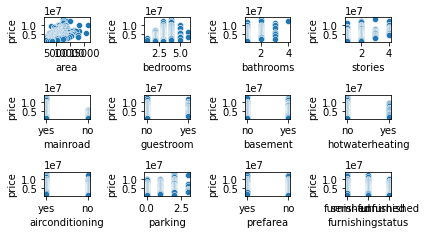

In [6]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

colNames=x.columns
tmpY=y

for i , col in enumerate(colNames,1):
    plt.subplot(4,4,i)
    sns.scatterplot(x=x[col],y=tmpY)
    plt.xlabel(col)
    plt.ylabel('price')

plt.tight_layout()
plt.show()

In [7]:
#7 Encoding categorical data in X
catCol=x.select_dtypes(include=['object','category']).columns

x=pd.get_dummies(x,columns=catCol,drop_first=True)
x

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [9]:
#8  Avoiding the Dummy Variable Trap
x=pd.get_dummies(x,columns=catCol,drop_first=True)


KeyError: "None of [Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',\n       'airconditioning', 'prefarea', 'furnishingstatus'],\n      dtype='object')] are in the [columns]"

In [10]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
print(x.dtypes)
numCol=x.select_dtypes(include=['float64']).columns
scaler=StandardScaler()
x[numCol]=scaler.fit_transform(x[numCol])
x

area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_yes                        bool
guestroom_yes                       bool
basement_yes                        bool
hotwaterheating_yes                 bool
airconditioning_yes                 bool
prefarea_yes                        bool
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object


ValueError: at least one array or dtype is required

In [ ]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(x_train.shape,x_test.shape)

(381, 13) (164, 13)


In [ ]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#12 Predict on the train set and calculate the error = y_pred - y_train

yPred_train=model.predict(x_train)
error=yPred_train-y_train
print(error.head())

243   -1.030030e+06
47    -9.620113e+04
463   -1.237307e+05
532    7.086570e+03
141    1.085670e+06
Name: price, dtype: float64


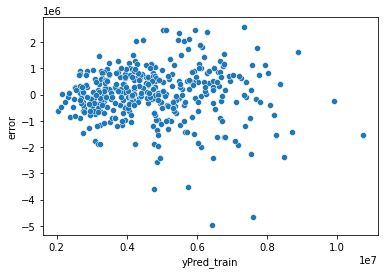

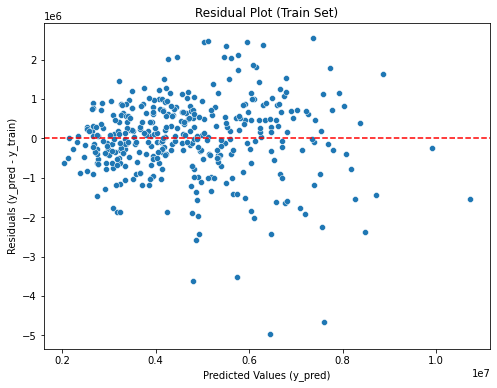

In [ ]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

sns.scatterplot(x=yPred_train,y=error)
plt.xlabel('yPred_train')
plt.ylabel('error')
plt.show()

# # Residuals
# residuals = yPred_train - y_train

# # Plot
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=yPred_train, y=residuals)
# plt.axhline(0, color='red', linestyle='--')  # Zero error line
# plt.xlabel('Predicted Values (y_pred)')
# plt.ylabel('Residuals (y_pred - y_train)')
# plt.title('Residual Plot (Train Set)')
# plt.show()

In [ ]:
#14  Predict on the test set
yPred_test=model.predict(x_test)

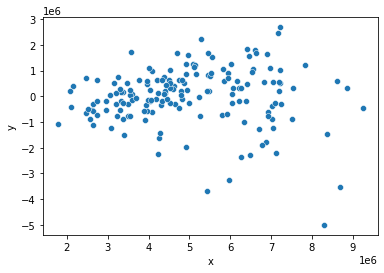

In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
error=yPred_test-y_test
sns.scatterplot(x=yPred_test,y=error)
plt.xlabel("x")
plt.ylabel('y')
plt.show()

In [ ]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y_test,yPred_test)
r2=r2_score(y_test,yPred_test)
print(f"mean sq error : {mse}")
print(f"r2 score : {r2}")

mean sq error : 1240303064754.061
r2 score : 0.6781583912031679


In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
df
selectedCol=['area','bedrooms','bathrooms','stories','airconditioning_yes']
print(x_train.columns)

x_train_sel=x_train[selectedCol]
x_test_sel=x_test[selectedCol]

model=LinearRegression()
model.fit(x_train_sel,y_train)

yPred_sel=model.predict(x_test_sel)

r2_sel=r2_score(y_test,yPred_sel)

n=x_test_sel.shape[0]
p=x_test_sel.shape[1]

adjust_r2=1-(((1-r2_sel)*(n-1))/(n-p-1))

print(f"R² (selected features): {r2_sel:.4f}")
print(f"Adjusted R²: {adjust_r2:.4f}")


Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')
R² (selected features): 0.4859
Adjusted R²: 0.4696
